In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
%matplotlib inline

In [59]:
df=pd.read_csv('loan 1.csv')

In [60]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [62]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [63]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [64]:
df.head(367)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002175,Male,Yes,0,Graduate,No,4750,2333.0,130.0,360.0,1.0,Urban,Y
363,LP002178,Male,Yes,0,Graduate,No,3013,3033.0,95.0,300.0,NaN,Urban,Y
364,LP002180,Male,No,0,Graduate,Yes,6822,0.0,141.0,360.0,1.0,Rural,Y
365,LP002181,Male,No,0,Not Graduate,No,6216,0.0,133.0,360.0,1.0,Rural,N


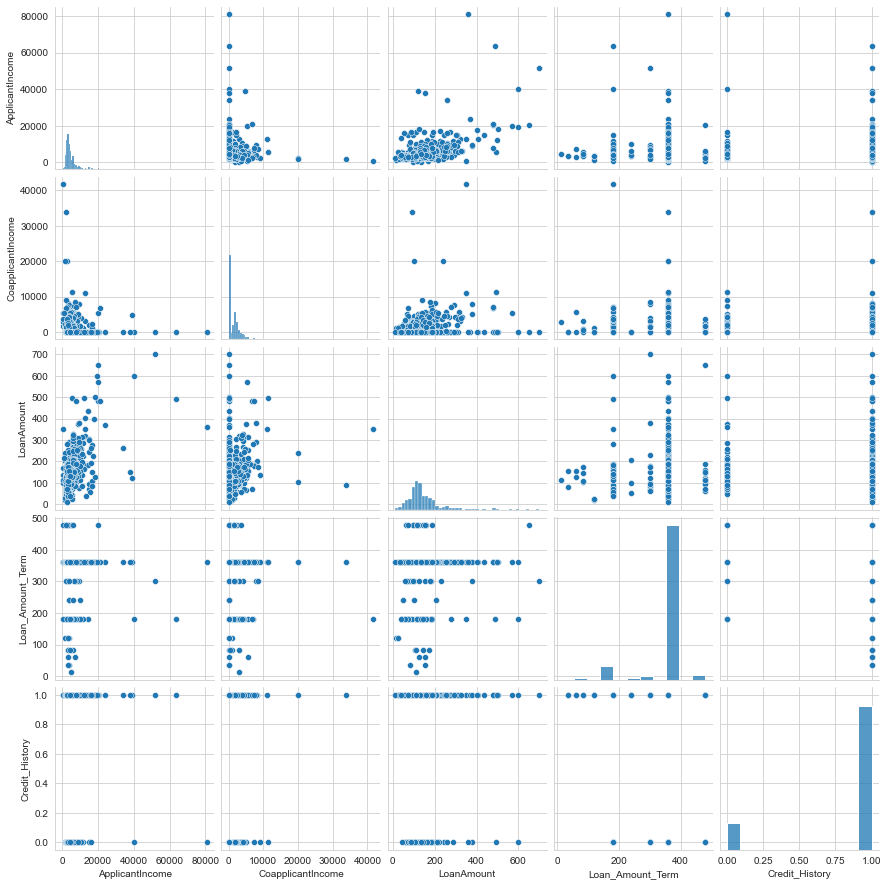

In [65]:
sns.pairplot(df)

In [66]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [67]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

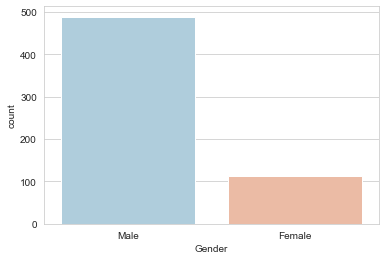

In [68]:
sns.set_style('whitegrid')
sns.countplot(x='Gender',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='Education', ylabel='count'>

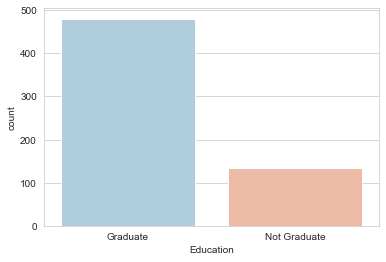

In [69]:
sns.set_style('whitegrid')
sns.countplot(x='Education',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='Gender', ylabel='count'>

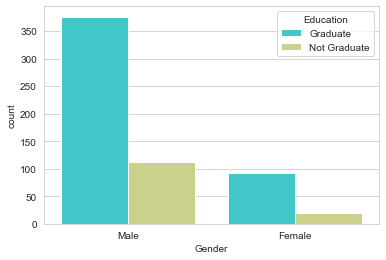

In [70]:
sns.set_style('whitegrid')
sns.countplot(x='Gender',hue='Education',data=df,palette='rainbow')

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

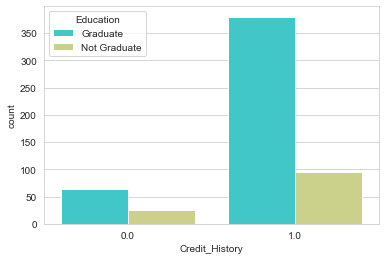

In [71]:
sns.set_style('whitegrid')
sns.countplot(x='Credit_History',hue='Education',data=df,palette='rainbow')

In [72]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [73]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [74]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [75]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [76]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [77]:
df['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [78]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [79]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [80]:
df=df.fillna(df.mode().iloc[0])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [81]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [82]:
df.head(25)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


<AxesSubplot:>

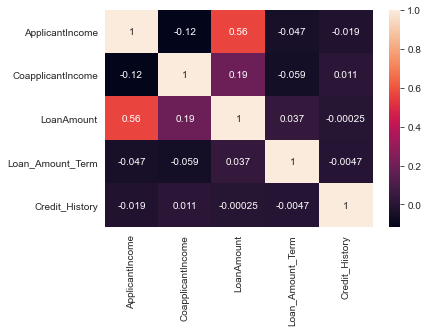

In [83]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

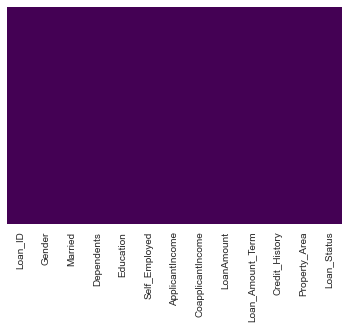

In [84]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

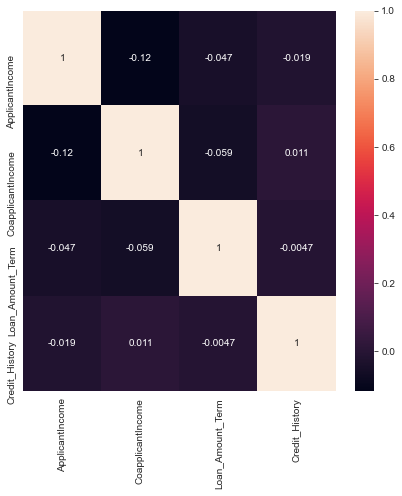

In [85]:
plt.figure(figsize=(7,7))
sns.heatmap(df['Loan_ID Gender Married Dependents Education Self_Employed ApplicantIncome CoapplicantIncome Loan_Amount_Term Credit_History Property_Area'.split()].corr(), annot=True)

In [86]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [87]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Married']=le.fit_transform(df['Married'])

In [88]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Education']=le.fit_transform(df['Education'])

In [89]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Self_Employed']=le.fit_transform(df['Self_Employed'])

In [90]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Property_Area']=le.fit_transform(df['Property_Area'])

In [91]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [92]:
df['Dependents']=le.fit_transform(df['Dependents'])

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1), object(1)
memory usage: 45.7+ KB


<AxesSubplot:xlabel='Gender', ylabel='Married'>

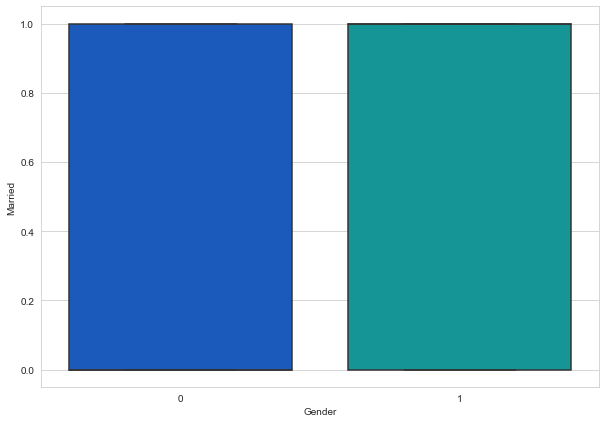

In [94]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Gender',y='Married',data=df,palette='winter')

In [95]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [96]:
df.drop('Loan_ID',axis=1,inplace=True)

In [97]:
x=df.drop(['Loan_Status'],axis=1)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [98]:
x=df[['Gender','Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term', 'Credit_History','Property_Area']]


In [99]:
y=df[['Loan_Status']]


In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6 , random_state=100)

In [101]:
from sklearn.linear_model import LogisticRegression #logistic regression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [102]:
prediction=logmodel.predict(x_test)

In [103]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
result=confusion_matrix(y_test,prediction)
result

array([[ 35,  44],
       [  5, 162]], dtype=int64)

In [104]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.88      0.44      0.59        79
           1       0.79      0.97      0.87       167

    accuracy                           0.80       246
   macro avg       0.83      0.71      0.73       246
weighted avg       0.81      0.80      0.78       246



In [105]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train, y_train)
y_pred=svc_model.predict(x_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
result=confusion_matrix(y_test,y_pred)
print(result)
print(classification_report(y_test,y_pred))

[[  0  79]
 [  1 166]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        79
           1       0.68      0.99      0.81       167

    accuracy                           0.67       246
   macro avg       0.34      0.50      0.40       246
weighted avg       0.46      0.67      0.55       246



C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [106]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
result=confusion_matrix(y_test,y_pred)
print(result)
print(classification_report(y_test,y_pred))

[[ 37  42]
 [ 13 154]]
              precision    recall  f1-score   support

           0       0.74      0.47      0.57        79
           1       0.79      0.92      0.85       167

    accuracy                           0.78       246
   macro avg       0.76      0.70      0.71       246
weighted avg       0.77      0.78      0.76       246



C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<AxesSubplot:>

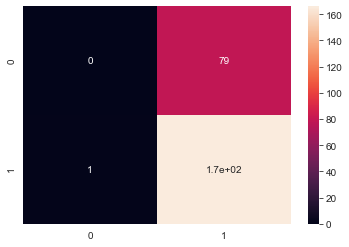

In [107]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = svc_model.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [110]:
new_input=[[1,0,0,0,1,3553,2668.00,108.00,268.0,1.0,0]]
new_output=lr.predict(new_input)
print(new_input,new_output)

[[1, 0, 0, 0, 1, 3553, 2668.0, 108.0, 268.0, 1.0, 0]] [[0.7598227]]
